In [3]:
import numpy as np
import xarray as xr 
import matplotlib.pyplot as plt
from dask.distributed import Client, LocalCluster
from dask_jobqueue import PBSCluster

In [4]:
# Note

"""

This notebook has been ran on Derecho servers. I am trying to set it up so it can be run on a HPC system of choice such that the notebook is ran interactively on a login node, but accesses a HPC cluster which does the computations.

"""
# n_workers = 6 
# threads_per_worker = 6
# memory_limit = "30GiB"

# # Connect to Dask client
# # Configure the PBSCluster with updated parameters
# cluster = PBSCluster(
#     account='P93300043',
#     queue='main',
#     walltime='2:00:00',  # Set the walltime as needed
#     cores=n_workers*threads_per_worker,                         # Total cores for the entire job
#     memory=memory_limit,                   # Memory per job (worker)
#     processes=n_workers,                    # Number of Dask worker processes - threads per worker calculated as cores/processes
#     resource_spec='select=1:ncpus=36:mem=180GB',  # Adjust the resource specification as needed
# )
# cluster.scale(1)
# client = Client(cluster)

cluster = LocalCluster()#n_workers=6,threads_per_worker=6,memory_limit="30GiB")
client = Client(cluster)

/glade/work/mmkupilas/conda-envs/analysis/lib/python3.12/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 35487 instead
  warnings.warn(


In [5]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/mmkupilas/mmk_server/proxy/35487/status,
Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/mmkupilas/mmk_server/proxy/35487/status,Workers: 1
Total threads: 1,Total memory: 40.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:34159,Workers: 1
Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/mmkupilas/mmk_server/proxy/35487/status,Total threads: 1
Started: Just now,Total memory: 40.00 GiB
Comm: tcp://127.0.0.1:42035,Total threads: 1
Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/mmkupilas/mmk_server/proxy/42967/status,Memory: 40.00 GiB
Nanny: tcp://127.0.0.1:45653,


In [6]:
path1 = "/glade/derecho/scratch/mmkupilas/archive/f.e23.FWmaHIST.ne30pg3_ne30pg3_mg17_L135.001/atm/hist/"
file1 = "f.e23.FWmaHIST.ne30pg3_ne30pg3_mg17_L135.001.cam.h7a.2010-02-22-00000.nc" # don't have 02-21

path2 = "/glade/derecho/scratch/mmkupilas/archive/f.e23.FWmaHIST.ne30pg3_ne30pg3_mg17_L135.no_tromso_gw.002/atm/hist/"
file2 = "f.e23.FWmaHIST.ne30pg3_ne30pg3_mg17_L135.no_tromso_gw.002.cam.h7a.2010-02-21-00000.nc"

path3 = "/glade/derecho/scratch/mmkupilas/f.e23.FWmaHIST.ne0np4.tromso01.ne30x8.L135.no_tromso_gw/run/"
# file3 = "*h0i*2010-02-27*"
file3 = "f.e23.FWmaHIST.ne0np4.tromso01.ne30x8.L135.no_tromso_gw.cam.h7a.2010-02-25-00000.nc"

In [7]:
%time ds1 = xr.open_mfdataset(path1+file1)
%time ds2 = xr.open_mfdataset(path2+file2)
%time ds3 = xr.open_mfdataset(path3+file3)

CPU times: user 413 ms, sys: 93 ms, total: 506 ms
Wall time: 4.96 s
CPU times: user 26.7 ms, sys: 9.38 ms, total: 36 ms
Wall time: 233 ms
CPU times: user 25 ms, sys: 3.21 ms, total: 28.3 ms
Wall time: 111 ms


In [20]:
# print(ds1,'\n################')
# print(ds2,'\n################')
# print(ds3,'\n################')

In [8]:
ds2

<xarray.Dataset> Size: 10GB
Dimensions:       (ncol: 48600, lev: 135, ilev: 136, trop_pref: 100,
                   trop_prefi: 101, trop_cld_lev: 100, time: 26, nbnd: 2)
Coordinates:
  * lev           (lev) float64 1kB 6.14e-06 1.433e-05 2.788e-05 ... 991.2 997.5
  * ilev          (ilev) float64 1kB 2.043e-06 1.024e-05 ... 995.1 1e+03
  * trop_pref     (trop_pref) float64 800B 1.058 1.225 1.41 ... 991.2 997.5
  * trop_prefi    (trop_prefi) float64 808B 0.9833 1.142 1.317 ... 995.1 1e+03
  * trop_cld_lev  (trop_cld_lev) float64 800B 1.058 1.225 1.41 ... 991.2 997.5
  * time          (time) object 208B 2010-02-20 12:00:00 ... 2010-03-17 12:00:00
Dimensions without coordinates: ncol, nbnd
Data variables: (12/36)
    lat           (ncol) float64 389kB dask.array<chunksize=(48600,), meta=np.ndarray>
    lon           (ncol) float64 389kB dask.array<chunksize=(48600,), meta=np.ndarray>
    areawt        (ncol) float64 389kB dask.array<chunksize=(48600,), meta=np.ndarray>
    area          (ncol) float64 389kB dask.array<chunksize=(48600,), meta=np.ndarray>
    hyam          (lev) float64 1kB dask.array<chunksize=(135,), meta=np.ndarray>
    hybm          (lev) float64 1kB dask.array<chunksize=(135,), meta=np.ndarray>
    ...            ...
    U             (time, lev, ncol) float32 682MB dask.array<chunksize=(26, 135, 48600), meta=np.ndarray>
    V             (time, lev, ncol) float32 682MB dask.array<chunksize=(26, 135, 48600), meta=np.ndarray>
    Z3            (time, lev, ncol) float32 682MB dask.array<chunksize=(26, 135, 48600), meta=np.ndarray>
    so4_a1        (time, lev, ncol) float32 682MB dask.array<chunksize=(26, 135, 48600), meta=np.ndarray>
    so4_a2        (time, lev, ncol) float32 682MB dask.array<chunksize=(26, 135, 48600), meta=np.ndarray>
    so4_a3        (time, lev, ncol) float32 682MB dask.array<chunksize=(26, 135, 48600), meta=np.ndarray>
Attributes:
    ne:                30
    fv_nphys:          3
    Conventions:       CF-1.0
    source:            CAM
    case:              f.e23.FWmaHIST.ne30pg3_ne30pg3_mg17_L135.no_tromso_gw.002
    logname:           mmkupilas
    host:              dec0071
    initial_file:      /glade/derecho/scratch/mmkupilas/f.e23.FWmaHIST.ne30pg...
    topography_file:   /glade/work/juliob/bndtopo/ne30pg3_gmted2010_modis_bed...
    model_doi_url:     not_set
    time_period_freq:  day_1

In [9]:
ds1_temp = ds1[['T','U','V','lat','lon','area']]
ds2_temp = ds2[['T','U','V','lat','lon','area']]
ds3_temp = ds3[['T','U','V','lat','lon','area']]

In [12]:
# Shift lon to be on -180 - 180 grid
ds1_temp['lon'] = xr.where(ds1_temp['lon'] > 180, ds1_temp['lon'] - 360, ds1_temp['lon'])
ds2_temp['lon'] = xr.where(ds2_temp['lon'] > 180, ds2_temp['lon'] - 360, ds2_temp['lon'])
ds3_temp['lon'] = xr.where(ds3_temp['lon'] > 180, ds3_temp['lon'] - 360, ds3_temp['lon'])

In [13]:
print('Calculating and plotting daily mean and domain mean for 2010 02-22 (ds1), 02-21 (ds2), 02-25 (ds3)')
print('Domain mean weighted by cell area')
print('center lat = 70, center lon = 20')
print('small ~ 1 x 1 deg box centered on center lat and center lon')
print('medium ~ 5 x 5 deg box')
print('large = 10 x 10 deg box')
print('Units: Kelvin (T), m/s (U and V)')

Calculating and plotting daily mean and domain mean for 2010 02-22 (ds1), 02-21 (ds2), 02-25 (ds3)
Domain mean weighted by cell area
center lat = 70, center lon = 20
small ~ 1 x 1 deg box centered on center lat and center lon
medium ~ 5 x 5 deg box
large = 10 x 10 deg box
Units: Kelvin (T), m/s (U and V)


In [79]:

center_lat = 67
center_lon = 24

In [80]:
# Narrow down ranges ds1
ds1_temp_small = ds1_temp.where((ds1_temp.lat >= center_lat - 1) & (ds1_temp.lat <=  center_lat + 1) & (ds1_temp.lon >= center_lon - 1) & (ds1_temp.lon <=  center_lon + 1 )).dropna(dim='ncol')
ds1_temp_medium = ds1_temp.where((ds1_temp.lat >= center_lat - 2.5) & (ds1_temp.lat <=  center_lat + 2.5) & (ds1_temp.lon >= center_lon - 2.5) & (ds1_temp.lon <=  center_lon + 2.5)).dropna(dim='ncol')
ds1_temp_large = ds1_temp.where((ds1_temp.lat >= center_lat - 5 ) & (ds1_temp.lat <=  center_lat + 5) & (ds1_temp.lon >= center_lon - 5 ) & (ds1_temp.lon <=  center_lon + 5)).dropna(dim='ncol')

In [82]:
# take average ds1
ds1_temp_small_mean = ds1_temp_small.isel(time=0).weighted(weights=ds1_temp_small.isel(time=0).area).mean(dim='ncol')#.isel(time=0)['T'].plot()
ds1_temp_medium_mean = ds1_temp_medium.isel(time=0).weighted(weights=ds1_temp_medium.isel(time=0).area).mean(dim='ncol')#.isel(time=0)['T'].plot()
ds1_temp_large_mean = ds1_temp_large.isel(time=0).weighted(weights=ds1_temp_large.isel(time=0).area).mean(dim='ncol')#.isel(time=0)['T'].plot()

In [83]:
# Narrow down ranges ds2
ds2_temp_small = ds2_temp.where((ds2_temp.lat >= center_lat - 1) & (ds2_temp.lat <=  center_lat + 1) & (ds2_temp.lon >= center_lon - 1) & (ds2_temp.lon <=  center_lon + 1 )).dropna(dim='ncol')
ds2_temp_medium = ds2_temp.where((ds2_temp.lat >= center_lat - 2.5) & (ds2_temp.lat <=  center_lat + 2.5) & (ds2_temp.lon >= center_lon - 2.5) & (ds2_temp.lon <=  center_lon + 2.5)).dropna(dim='ncol')
ds2_temp_large = ds2_temp.where((ds2_temp.lat >= center_lat - 5 ) & (ds2_temp.lat <=  center_lat + 5) & (ds2_temp.lon >= center_lon - 5 ) & (ds2_temp.lon <=  center_lon + 5)).dropna(dim='ncol')

In [84]:
# take average ds1
ds2_temp_small_mean = ds2_temp_small.isel(time=0).weighted(weights=ds2_temp_small.isel(time=0).area).mean(dim='ncol')#.isel(time=0)['T'].plot()
ds2_temp_medium_mean = ds2_temp_medium.isel(time=0).weighted(weights=ds2_temp_medium.isel(time=0).area).mean(dim='ncol')#.isel(time=0)['T'].plot()
ds2_temp_large_mean = ds2_temp_large.isel(time=0).weighted(weights=ds2_temp_large.isel(time=0).area).mean(dim='ncol')#.isel(time=0)['T'].plot()

In [85]:
# Narrow down ds3 range
ds3_temp_small = ds3_temp.where((ds3_temp.lat >= center_lat - 1) & (ds3_temp.lat <=  center_lat + 1) & (ds3_temp.lon >= center_lon - 1) & (ds3_temp.lon <=  center_lon + 1 )).dropna(dim='ncol')
ds3_temp_medium = ds3_temp.where((ds3_temp.lat >= center_lat - 2.5) & (ds3_temp.lat <=  center_lat + 2.5) & (ds3_temp.lon >= center_lon - 2.5) & (ds3_temp.lon <=  center_lon + 2.5)).dropna(dim='ncol')
ds3_temp_large = ds3_temp.where((ds3_temp.lat >= center_lat - 5 ) & (ds3_temp.lat <=  center_lat + 5) & (ds3_temp.lon >= center_lon - 5 ) & (ds3_temp.lon <=  center_lon + 5)).dropna(dim='ncol')

In [86]:
# Take ds3 average

ds3_temp_small_mean = ds3_temp_small.isel(time=0).weighted(weights=ds3_temp_small.isel(time=0).area).mean(dim='ncol')#.isel(time=0)['T'].plot()
ds3_temp_medium_mean = ds3_temp_medium.isel(time=0).weighted(weights=ds3_temp_medium.isel(time=0).area).mean(dim='ncol')#.isel(time=0)['T'].plot()
ds3_temp_large_mean = ds3_temp_large.isel(time=0).weighted(weights=ds3_temp_large.isel(time=0).area).mean(dim='ncol')#.isel(time=0)['T'].plot()

In [87]:
print('WACCM Out of the box (OOTB) points')
print('n ncol small', np.size(ds1_temp_small.ncol))
print('n ncol med', np.size(ds1_temp_medium.ncol))
print('n ncol large ', np.size(ds1_temp_large.ncol))

print('WACCM no gravity waves over Scandinavia (nogw) points')
print('n ncol small', np.size(ds2_temp_small.ncol))
print('n ncol med', np.size(ds2_temp_medium.ncol))
print('n ncol large ', np.size(ds2_temp_large.ncol))

print('WACCM-RR points')
print('n ncol small', np.size(ds3_temp_small.ncol))
print('n ncol med', np.size(ds3_temp_medium.ncol))
print('n ncol large ',  np.size(ds3_temp_large.ncol))

WACCM Out of the box (OOTB) points
n ncol small 2
n ncol med 11
n ncol large  41
WACCM no gravity waves over Scandinavia (nogw) points
n ncol small 2
n ncol med 11
n ncol large  41
WACCM-RR points
n ncol small 102
n ncol med 629
n ncol large  2425


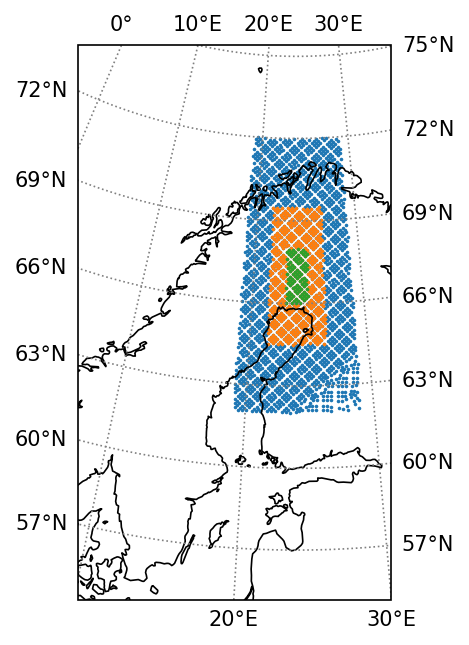

In [92]:
import cartopy.crs as ccrs

# Plot WACCM-RR points
xds3sm = ds3_temp_small.lon
yds3sm = ds3_temp_small.lat

xds3med = ds3_temp_medium.lon
yds3med = ds3_temp_medium.lat

xds3lar = ds3_temp_large.lon
yds3lar = ds3_temp_large.lat

fig = plt.figure(dpi=150)

ax = plt.axes(projection=ccrs.Orthographic(central_longitude=center_lon, central_latitude=center_lat))

plt.scatter(xds3lar,yds3lar,transform=ccrs.PlateCarree(), s=0.5)
plt.scatter(xds3med,yds3med,transform=ccrs.PlateCarree(), s=0.5)
plt.scatter(xds3sm,yds3sm,transform=ccrs.PlateCarree(), s=0.5)

ax.coastlines(resolution='50m', color='black', linewidth=0.8)
gl = ax.gridlines(draw_labels=True,linestyle=':', color='gray')

ax.set_extent([10,30,55,75])

In [93]:
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

In [94]:
print('plotting daily mean and domain mean for 2010 02-22 (ds1), 02-21 (ds2), 02-25 (ds3)')
print('Domain mean weighted by cell area')
print(f'center lat = {center_lat}, center lon = {center_lon}')
print('small ~ 1 x 1 deg box centered on center lat and center lon')
print('medium ~ 5 x 5 deg box')
print('large = 10 x 10 deg box')
print('Units: Kelvin (T), m/s (U and V)')

plotting daily mean and domain mean for 2010 02-22 (ds1), 02-21 (ds2), 02-25 (ds3)
Domain mean weighted by cell area
center lat = 67, center lon = 24
small ~ 1 x 1 deg box centered on center lat and center lon
medium ~ 5 x 5 deg box
large = 10 x 10 deg box
Units: Kelvin (T), m/s (U and V)


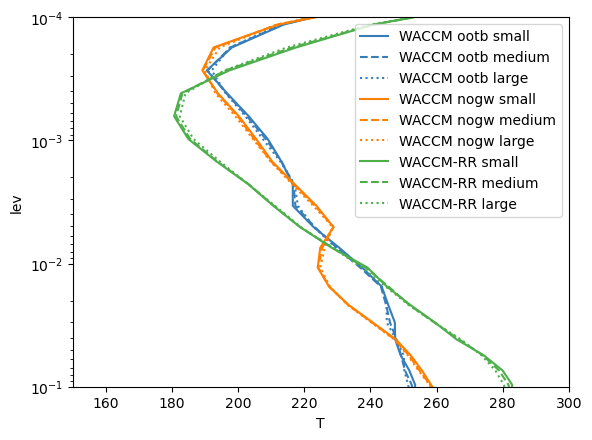

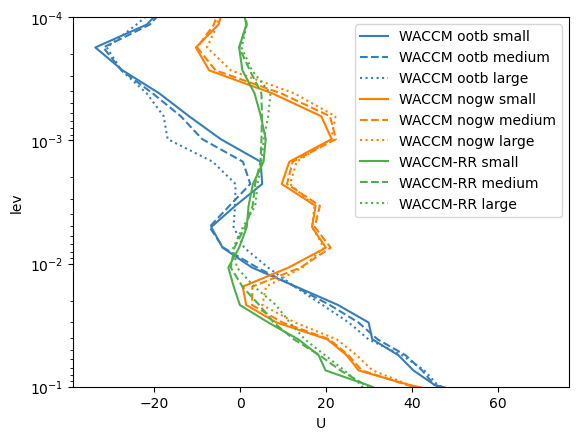

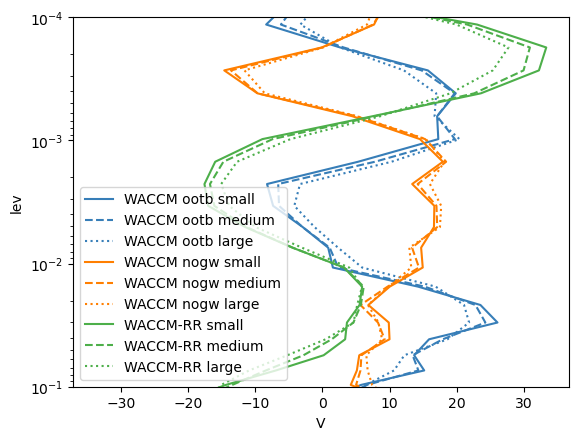

In [95]:
for var in ['T','U','V']:

    plt.figure()
    
    ds1_temp_small_mean[var].plot(y='lev',label='WACCM ootb small',color=CB_color_cycle[0],linestyle='-')
    ds1_temp_medium_mean[var].plot(y='lev', label='WACCM ootb medium',color=CB_color_cycle[0],linestyle='--')
    ds1_temp_large_mean[var].plot(y='lev', label='WACCM ootb large',color=CB_color_cycle[0],linestyle=':')
    
    ds2_temp_small_mean[var].plot(y='lev',label='WACCM nogw small',color=CB_color_cycle[1],linestyle='-')
    ds2_temp_medium_mean[var].plot(y='lev', label='WACCM nogw medium',color=CB_color_cycle[1],linestyle='--')
    ds2_temp_large_mean[var].plot(y='lev', label='WACCM nogw large',color=CB_color_cycle[1],linestyle=':')
    
    ds3_temp_small_mean[var].plot(y='lev',label='WACCM-RR small',color=CB_color_cycle[2],linestyle='-')
    ds3_temp_medium_mean[var].plot(y='lev', label='WACCM-RR medium',color=CB_color_cycle[2],linestyle='--')
    ds3_temp_large_mean[var].plot(y='lev', label='WACCM-RR large',color=CB_color_cycle[2],linestyle=':')
    
    ax=plt.gca()
    ax.set_yscale('log')
    ax.set_ylim(1e-1,1e-4)

    if var == 'T':
        ax.set_xlim(150,300)

    plt.legend()
    plt.title("")
